In [2]:
import torch
from matplotlib import pyplot as plt 

In [3]:
root_path = "/home/yigit/projects/mbcnp/outputs/sine/"
suffix = '1691259308'  # TODO: get all the suffixes from the folder
tl_code, ve_code = 'training_loss', 'validation_error'
cnp_tl_path, cnp_ve_path = f'{root_path}{suffix}/cnp_{tl_code}.pt', f'{root_path}{suffix}/cnp_{ve_code}.pt'
wta_tl_path, wta_ve_path = f'{root_path}{suffix}/wta_{tl_code}.pt', f'{root_path}{suffix}/wta_{ve_code}.pt'

In [11]:
cnp_tl, cnp_ve = torch.load(cnp_tl_path), torch.load(cnp_ve_path)
wta_tl, wta_ve = torch.load(wta_tl_path), torch.load(wta_ve_path)

tl_size, ve_size = min(cnp_tl.shape[0], wta_tl.shape[0]), min(cnp_ve.shape[0], wta_ve.shape[0])
print(tl_size, ve_size)

cnp_tl, cnp_ve = cnp_tl[:tl_size], cnp_ve[:ve_size]
wta_tl, wta_ve = wta_tl[:tl_size], wta_ve[:ve_size]

1848070 1849
torch.Size([1848070]) torch.Size([1848070])


In [6]:
cnp_tl_mean, cnp_ve_mean = cnp_tl.mean(dim=0), cnp_ve.mean(dim=0)
cnp_tl_std, cnp_ve_std = cnp_tl.std(dim=0), cnp_ve.std(dim=0)
wta_tl_mean, wta_ve_mean = wta_tl.mean(dim=0), wta_ve.mean(dim=0)
wta_tl_std, wta_ve_std = wta_tl.std(dim=0), wta_ve.std(dim=0)

In [22]:
from tqdm import tqdm

tl_window_size = 20000

tl_filtered_size = tl_size - tl_window_size + 1
cnp_filtered_tl = torch.zeros(tl_filtered_size)
wta_filtered_tl = torch.zeros(tl_filtered_size)

for i in tqdm(range(tl_filtered_size)):
    cnp_filtered_tl[i] = cnp_tl[i:i + tl_window_size].mean()
    wta_filtered_tl[i] = wta_tl[i:i + tl_window_size].mean()

100%|██████████| 1828071/1828071 [00:39<00:00, 46870.97it/s]


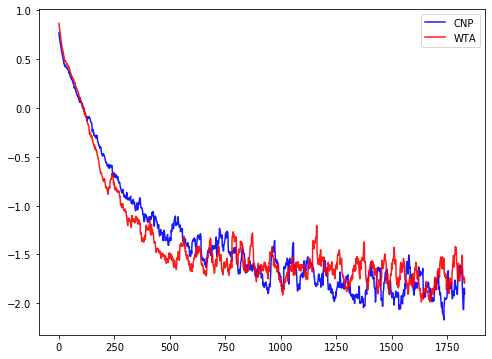

In [30]:
step=1000
idx = torch.arange(start=0, end=tl_filtered_size, step=step)

x = torch.arange(idx.shape[0])
y1 = cnp_filtered_tl[idx]
y2 = wta_filtered_tl[idx]

plt.figure(figsize=(8, 6))

plt.plot(x, y1, 'b-', label='CNP', alpha=0.9)
plt.plot(x, y2, 'r-', label='WTA', alpha=0.9)
plt.legend(loc='upper right')

# Display the plot
plt.show()

<Figure size 576x432 with 0 Axes>

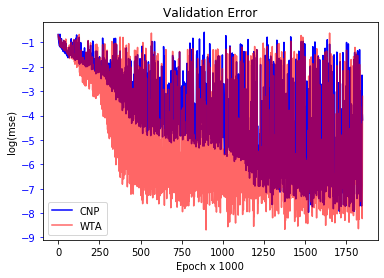

In [33]:
step=1
idx = torch.arange(start=0, end=ve_size, step=step)

x = torch.arange(idx.shape[0])
y1 = torch.log(cnp_ve[idx])
y2 = torch.log(wta_ve[idx])

plt.figure(figsize=(8, 6))

fig, ax1 = plt.subplots()
ax1.title.set_text('Validation Error')

ax1.plot(x, y1, 'b', label='CNP')
ax1.plot(x, y2, 'r', label='WTA', alpha=0.6)
ax1.set_xlabel(f'Epoch x 1000')
ax1.set_ylabel('log(mse)')
ax1.tick_params('y', colors='b')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='lower left')

# Display the plot
plt.show()